In [1]:
'''
Finding useful parameters to improve the accuracy of LinearSVM and non-LinearSVM.
'''

# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

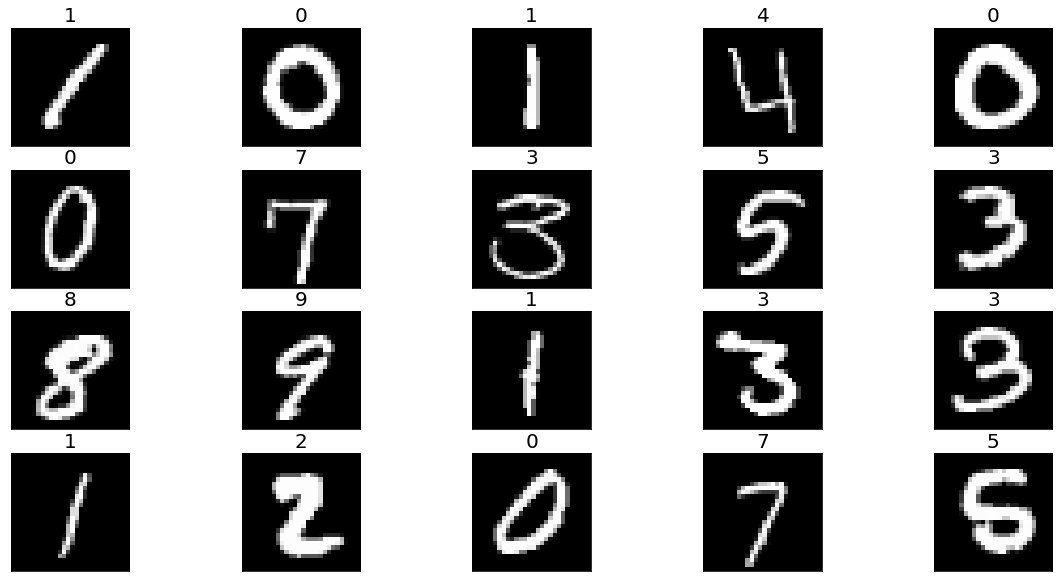

In [2]:
'''
Read data.
MNIST dataset.
'''
train = pd.read_csv('C:/Users/User/Desktop/Programming/Python/Data/digit-recognizer/train.csv')
Test = pd.read_csv('C:/Users/User/Desktop/Programming/Python/Data/digit-recognizer/test.csv')

train_y=train['label']
train_x=train.drop(labels = ["label"],axis = 1)

'''
Show a part of data.
'''
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    xx = train_x.iloc[i].to_numpy()
    plt.imshow(xx.reshape((28,28)), cmap='gray')
    plt.title(train_y[i],size = 20)

plt.show()

In [3]:
'''
Transform data variances to arrays.
'''
from keras.utils import np_utils

train_y = train_y.to_numpy()
train_x = train_x.to_numpy()/255
test = Test.to_numpy()/255

train_x, test_x, train_y, test_y = train_test_split(train_x, 
                                                    train_y, 
                                                    test_size = 0.5,
                                                    shuffle=True)

train_y_true = train_y
test_y_true = test_y


Using TensorFlow backend.
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

# LinearSVM

In [4]:
acc_tst = []
acc_tr = []
i = 0
df = pd.DataFrame(columns = ['c','train_acc','test_acc'])

for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    clf = svm.LinearSVC( C=c)
    clf.fit(train_x, train_y_true)
    
    p_tr = clf.predict(train_x)
    a_tr = accuracy_score(train_y_true, p_tr)

    p_tst = clf.predict(test_x)
    a_tst = accuracy_score(test_y_true, p_tst)
    
    acc_tr.append(a_tr)
    acc_tst.append(a_tst)
    
    df.loc[i] = [c,a_tr,a_tst]
    i=i+1
    

D:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [5]:
df

,c,train_acc,test_acc
0,0.0001,0.866286,0.867524
1,0.0010,0.904429,0.900524
2,0.0100,0.923714,0.910524
3,0.1000,0.936524,0.910714
4,1.0000,0.943143,0.905286
5,10.0000,0.936238,0.890381
6,100.0000,0.932048,0.886048
7,1000.0000,0.922333,0.874667
8,10000.0000,0.926000,0.878905


# nonLinearSVM with RBF kernal

In [6]:
acc_tst = []
acc_tr = []
i = 0
df = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])

for c in [0.001,0.01,0.1,1,10,100]:
    for g in [0.01, 0.1, 1, 10, 100]:
        clf = svm.SVC(kernel='rbf', C=c, gamma=g)
        clf.fit(train_x, train_y_true)

        p_tr = clf.predict(train_x)
        a_tr = accuracy_score(train_y_true, p_tr)

        p_tst = clf.predict(test_x)
        a_tst = accuracy_score(test_y_true, p_tst)

        acc_tr.append(a_tr)
        acc_tst.append(a_tst)

        df.loc[i] = [c,g,a_tr,a_tst]
        i=i+1
    

In [7]:
df

,c,gamma,train_acc,test_acc
0,0.001,0.01,0.112476,0.110571
1,0.001,0.10,0.112476,0.110571
2,0.001,1.00,0.112476,0.110571
3,0.001,10.00,0.112476,0.110571
4,0.001,100.00,0.112476,0.110571
5,0.010,0.01,0.874286,0.877095
6,0.010,0.10,0.189476,0.185286
7,0.010,1.00,0.112476,0.110571
8,0.010,10.00,0.112476,0.110571
9,0.010,100.00,0.112476,0.110571


# nonLinearSVM with Poly kernel

In [8]:
acc_tst = []
acc_tr = []
i = 0
df = pd.DataFrame(columns = ['c','degree','train_acc','test_acc'])

for c in [0.001,0.01,0.1,1,10,100]:
    for d in [2, 3, 4, 5, 6]:
        clf = svm.SVC(kernel='poly', C=c, degree=d)
        clf.fit(train_x, train_y_true)

        p_tr = clf.predict(train_x)
        a_tr = accuracy_score(train_y_true, p_tr)

        p_tst = clf.predict(test_x)
        a_tst = accuracy_score(test_y_true, p_tst)

        acc_tr.append(a_tr)
        acc_tst.append(a_tst)

        df.loc[i] = [c,d,a_tr,a_tst]
        i=i+1
    

In [9]:
df

,c,degree,train_acc,test_acc
0,0.001,2.0,0.339238,0.339571
1,0.001,3.0,0.302524,0.300190
2,0.001,4.0,0.281667,0.279524
3,0.001,5.0,0.277238,0.275190
4,0.001,6.0,0.277714,0.272857
5,0.010,2.0,0.867048,0.866667
6,0.010,3.0,0.806762,0.805238
7,0.010,4.0,0.721238,0.718190
8,0.010,5.0,0.639476,0.639095
9,0.010,6.0,0.581810,0.574238
